In [10]:
import numpy as np
import random
import string
import matplotlib.pyplot as plt
% matplotlib inline

In [121]:
class k_means(object):
    
    def __init__(self, k):
        self.k = k
    
    @staticmethod
    def _initialize_classes_(k, points):
        """
        This function takes in the number of classes,k, you want
        and it takes in the array of points, points, and returns a dictionary
        d[point] = class, where the class is assigned randomly with the restriction
        being at least one point for each class and k < number of points
        """
        d={}
        init_classes = []
        num_pnts = len(points)
        if k >= num_pnts:
            return 'k must be less than ' + str(num_pnts)
        while len(set(init_classes)) < k:
            init_classes = []
            for i in range(num_pnts):
                init_classes.append(random.choice(string.ascii_letters[0:k]))
        for c in init_classes:
            indices = [i for i, x in enumerate(init_classes) if x == c]
            for i in indices:
                d[tuple(points[i])] = c
        return d

    @staticmethod
    def _closest_cluster_(d):
        """
        This function takes in the dictionary, d, of point,class pairs,
        computes each cluster center, and re-assigns each point to the class
        whose center it is closest to and returns the updated dictionary
        """
        labels = set(d.values())
        cluster_centers = {}
        new_d = {}
        for label in labels:
            keys = [np.array(i) for i,x in d.items() if x==label]
            center = np.mean(keys, axis=0)
            cluster_centers[label] = center
        for point in d.keys():
            distances = []
            for k,v in cluster_centers.items():
                dist = np.dot(np.array(point)-v, np.array(point)-v)
                distances.append((dist, k))
            closest_cluster = min(distances)[1]
            new_d[point] = closest_cluster
        return new_d
    
    def fit(self, X):
        """
        This function takes in the number of classes,k, you want
        and it takes in the array of points, X, and runs closest_cluster
        until no more changes take place
        """
        d = self._initialize_classes_(self.k, X)
        old_d = {}
        while len({k: old_d[k] for k in old_d if k in d and old_d[k] == d[k]}) != len(X):
            old_d = d
            d = self._closest_cluster_(d)
        self._d = d
        #return d
    
    def predict(self, point):
        return self._d[point]
    
    def plot():
        pass

In [122]:
model = k_means(3)

In [123]:
points = np.array([[1,1], [10,10],[10,1],[10.5,2],[11,1],[1.5,1.5],[2,1.3],[10.5,10.8],[11,11],[11.5,11.5],[10.3,10.3]])

In [126]:
model.fit(points)

In [134]:
model.predict((10.5, 2))

'b'

In [135]:
d = {}
for point in points:
    print('Point: %r  Cluster: %s' %(tuple(point), model.predict(tuple(point))))
    d[tuple(point)] = model.predict(tuple(point))

Point: (1.0, 1.0)  Cluster: c
Point: (10.0, 10.0)  Cluster: a
Point: (10.0, 1.0)  Cluster: b
Point: (10.5, 2.0)  Cluster: b
Point: (11.0, 1.0)  Cluster: b
Point: (1.5, 1.5)  Cluster: c
Point: (2.0, 1.3)  Cluster: c
Point: (10.5, 10.8)  Cluster: a
Point: (11.0, 11.0)  Cluster: a
Point: (11.5, 11.5)  Cluster: a
Point: (10.3, 10.3)  Cluster: a


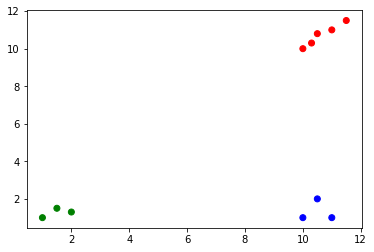

In [136]:
color_dict = {'a':'red','b':'blue','c':'green'}
plt.scatter(*zip(*d.keys()), color=[color_dict[i] for i in d.values()])

In [ ]:
# Depending on how class labels were first randomly distributed, you might get different results in the end.
# You might even get two clusters in this example, one at the top right corner, and another with the bottom
# left and right points merged as one cluster in the figure above.